# Notebook #1: EDA

In [3]:
# Librerías para tratamiento de datos y cálculos estadísticos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_preprocesamiento as sp

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("../../datos/api_rent_madrid.csv", index_col = 0, sep = ";")
df.reset_index(inplace=True, drop=True)

In [5]:
df.sample(2)

,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
268,30,710.0,flat,rent,66.0,True,3,1,Calle Cafarnaúm,Madrid,Parla,es,402.400.853,-37.762.193,False,20588,PROMOCIÓN: 1 MES DE ALQUILER GRATIS si reserva...,True,good,False,11.0,{'typology': 'flat'},"{'subtitle': 'Parque Inlasa, Parla', 'title': ...",True,False,True,False,False,False,CG-91304-0001,4,Parque Inlasa,NaN,False,NaN,NaN,NaN
163,16,725.0,flat,rent,50.0,True,1,1,"San Vicente de Paul, 3",Madrid,Villanueva del Pardillo,es,404.907.977,-39.669.988,True,23787,*DISPONIBILIDAD A PARTIR DEL 4 DE OCTUBRE * Ta...,False,good,False,15.0,{'typology': 'flat'},"{'subtitle': 'Centro, Villanueva del Pardillo'...",True,False,False,False,False,False,20.4 OR,en,Centro,NaN,False,NaN,NaN,NaN


In [6]:
sp.exploracion_datos(df)

El número de filas es 450 y el número de columnas es 37

----------

En este conjunto de datos tenemos 8 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


description                0.222222
hasVideo                   4.000000
status                     4.000000
newDevelopment             4.000000
priceByArea                4.000000
detailedType               4.000000
suggestedTexts             4.000000
hasPlan                    4.000000
has3DTour                  4.000000
has360                     4.000000
hasStaging                 4.000000
superTopHighlight          4.000000
topNewDevelopment          4.000000
externalReference         23.333333
floor                     18.666667
district                  24.888889
neighborhood              61.333333
hasLift                    6.888889
parkingSpace              68.888889
labels                    93.333333
newDevelopmentFinished    96.222222
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
numPhotos,450.0,21.900000,9.670346,0.0,15.00,21.0,28.00,72.0
price,450.0,671.797778,85.100603,340.0,640.00,700.0,740.00,750.0
size,450.0,68.237778,35.662557,20.0,47.25,62.0,80.00,371.0
rooms,450.0,1.700000,0.970041,0.0,1.00,2.0,2.00,6.0
bathrooms,450.0,1.213333,0.441500,1.0,1.00,1.0,1.00,3.0
distance,450.0,22455.771111,17001.691666,183.0,7104.25,20294.0,34979.75,59919.0
priceByArea,432.0,11.863426,5.360971,1.0,8.00,11.0,15.00,33.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
propertyType,450,6,flat,356
operation,450,1,rent,450
address,450,405,"Calle Valle de Ambles, 2",10
province,450,5,Madrid,358
municipality,450,96,Madrid,170
country,450,1,es,450
latitude,450,433,404.430.651,10
longitude,450,433,-34.659.877,10
description,449,427,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,10
hasVideo,432,2,False,314



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   numPhotos               450 non-null    int64  
 1   price                   450 non-null    float64
 2   propertyType            450 non-null    object 
 3   operation               450 non-null    object 
 4   size                    450 non-null    float64
 5   exterior                450 non-null    bool   
 6   rooms                   450 non-null    int64  
 7   bathrooms               450 non-null    int64  
 8   address                 450 non-null    object 
 9   province                450 non-null    object 
 10  municipality            450 non-null    object 
 11  country                 450 non-null    object 
 12  latitude                450 non-null    object 
 13  longitude               450 non

None

- Vamos ahora a revisar más en detalle las columnas con las que contamos:

In [7]:
df.columns

Index(['numPhotos', 'price', 'propertyType', 'operation', 'size', 'exterior',
       'rooms', 'bathrooms', 'address', 'province', 'municipality', 'country',
       'latitude', 'longitude', 'showAddress', 'distance', 'description',
       'hasVideo', 'status', 'newDevelopment', 'priceByArea', 'detailedType',
       'suggestedTexts', 'hasPlan', 'has3DTour', 'has360', 'hasStaging',
       'superTopHighlight', 'topNewDevelopment', 'externalReference', 'floor',
       'district', 'neighborhood', 'hasLift', 'parkingSpace', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

- En el dataframe encontramos un total de 37 columnas, sin embargo, muchas de ellas o no aportan información valiosa al modelo o podrían ser demasiado específicas, causando errores en las predicciones. Las columnas que eliminaremos y sus motivos son:

    - `Operation:` todas corresponden a "rent".
    - `Address:` incompletas, cantidad de nulos y especificidad.
    - `Province:` nos quedaremos únicamente con la provincia de "Madrid".
    - `Country:` el único país es "España".
    - `Description:` cantidad de nulos y especificidad.
    - `HasPlan, Has3DTour, Has360, numPhotos y HasVideo:` no son factores determinante del precio en este segmento de mercado.
    - `Status y NewDevelopment:` 95% de los datos corresponden a una sóla categoría.
    - `DetailedType:` información redundante con "PropertyType".
    - `SuggestedTexts:` especificidad y no aporta información relevante.
    - `HasStaging y SuperTopHighlight:` un único valor.
    - `ExternalReference:` no sabemos con qué se corresponde este dato.
    - `Neighborhood:` más del 61% de nulos y barrios que no existen.
    - `District:` datos erróneos, 96 valores únicos (muy específico para un dataset de 450) y 25% de nulos.
    - `ShowAddress:` códigos únicos.
    - `ParkingSpace:` más de un 50% de nulos
    - `Labels y NewDevelopmentFinished:` pocos datos y no aportan información.
    - `PriceByArea:` es el valor que queremos predecir (el precio (VR) sería el resultado de multiplicar este valor por el tamaño (size)).
    - `Latitude y Longitude:` datos geográficos que no son interpretables dentro del modelo.

- Con lo anterior, nos quedamos con 10 columnas, que consideramos afectan de manera directa el precio del alquiler: price, propertyType, size, exterior, rooms, bathrooms, municipality, distance, floor y hasLift.

- Primero, nos quedaremos únicamente con las viviendas de la provincia Madrid, y luego filtraremos el DF original.

In [8]:
df = df[df["province"] == "Madrid"]

In [9]:
df = df[["price", "propertyType", "size", "exterior", "rooms", "bathrooms", "municipality", "distance", "floor", "hasLift"]]

- Eliminamos los 6 duplicados identificados en la exploración inicial.

In [10]:
df.drop_duplicates(inplace= True)

- Y, tras el filtrado, nos quedamos con 352 filas y 10 columnas.

In [11]:
df.shape

(352, 10)

- Haremos ahora una separación de las columnas numéricas de las categóricas. En el caso de rooms y bathrooms se corresponden más con variables discretas, a pesar de su formato numérico, así que les cambiaremos el tipo.

In [12]:
df[["rooms", "bathrooms", "exterior"]] = df[["rooms", "bathrooms", "exterior"]].astype(str)

In [13]:
df.describe()

,price,size,distance
count,352.000000,352.000000,352.000000
mean,692.914773,59.750000,16726.116477
std,61.394234,23.830044,13559.071719
min,400.000000,20.000000,183.000000
25%,650.000000,45.000000,5648.750000
50%,702.500000,57.000000,12348.500000
75%,741.250000,70.250000,26571.250000
max,750.000000,206.000000,56596.000000


- Podemos observar que, excepto en el caso de distance, la mediana y la mediana no se alejan demasiado, lo que quiere decir que tenemos un dataset con datos bastante homogéneos (número más pequeño de outliers).

In [14]:
df.describe(include="O").T

,count,unique,top,freq
propertyType,352,6,flat,276
exterior,352,2,True,284
rooms,352,5,2,128
bathrooms,352,3,1,314
municipality,352,62,Madrid,169
floor,289,13,1,70
hasLift,334,2,True,173


- Para las variables categóricas, las ocurrencias más frecuentes son de pisos, exteriores, con 2 habitaciones y 1 baño, en el municipio de Madrid, en la primera planta y con ascensor.

In [15]:
df_num = df.select_dtypes(include = np.number)
cols_numericas = df_num.columns
cols_numericas

Index(['price', 'size', 'distance'], dtype='object')

In [16]:
df_num, df_cat = sp.separar_dataframe(df)

- Analizaremos gráficamente primero las variables numéricas con un countplot:

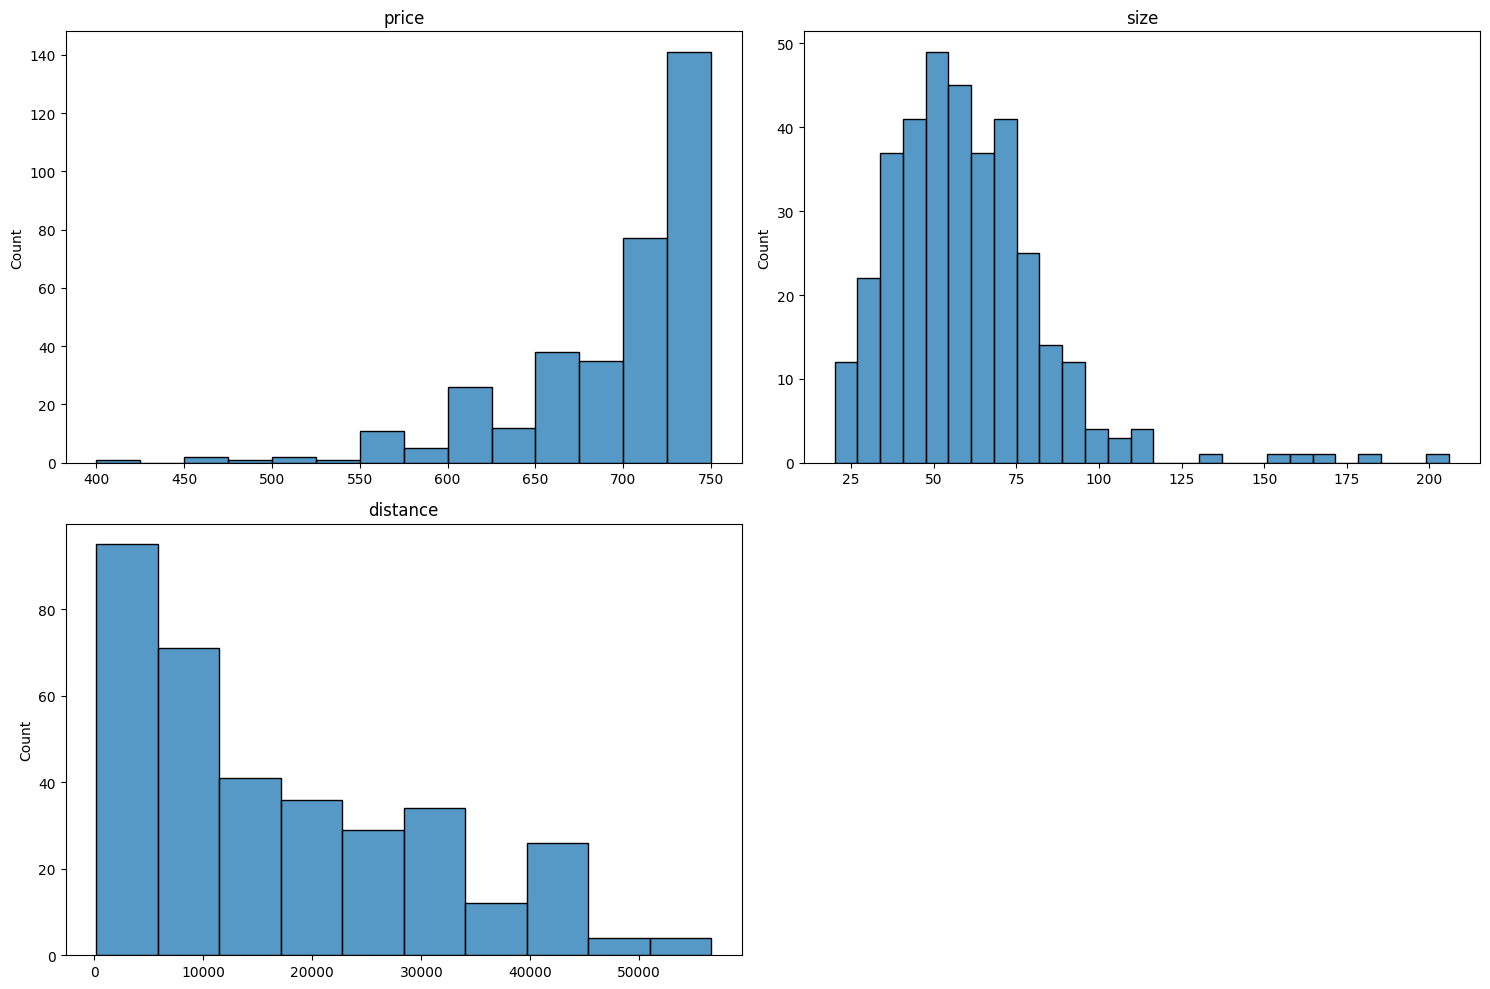

In [17]:
sp.plot_numericas(df_num)

- En la gráfica, observamos que las distribuciones no son normales, aunque en el caso de size podría acercarse si no fuera por la cola izquierda.
- Los datos se encuentran bastante agrupadosentre los 650 y 750 euros, entre 25 y 100 metros cuadrados y a una distancia de entre 0 y 10km del centro.
- Veremos ahora las categóricas. 

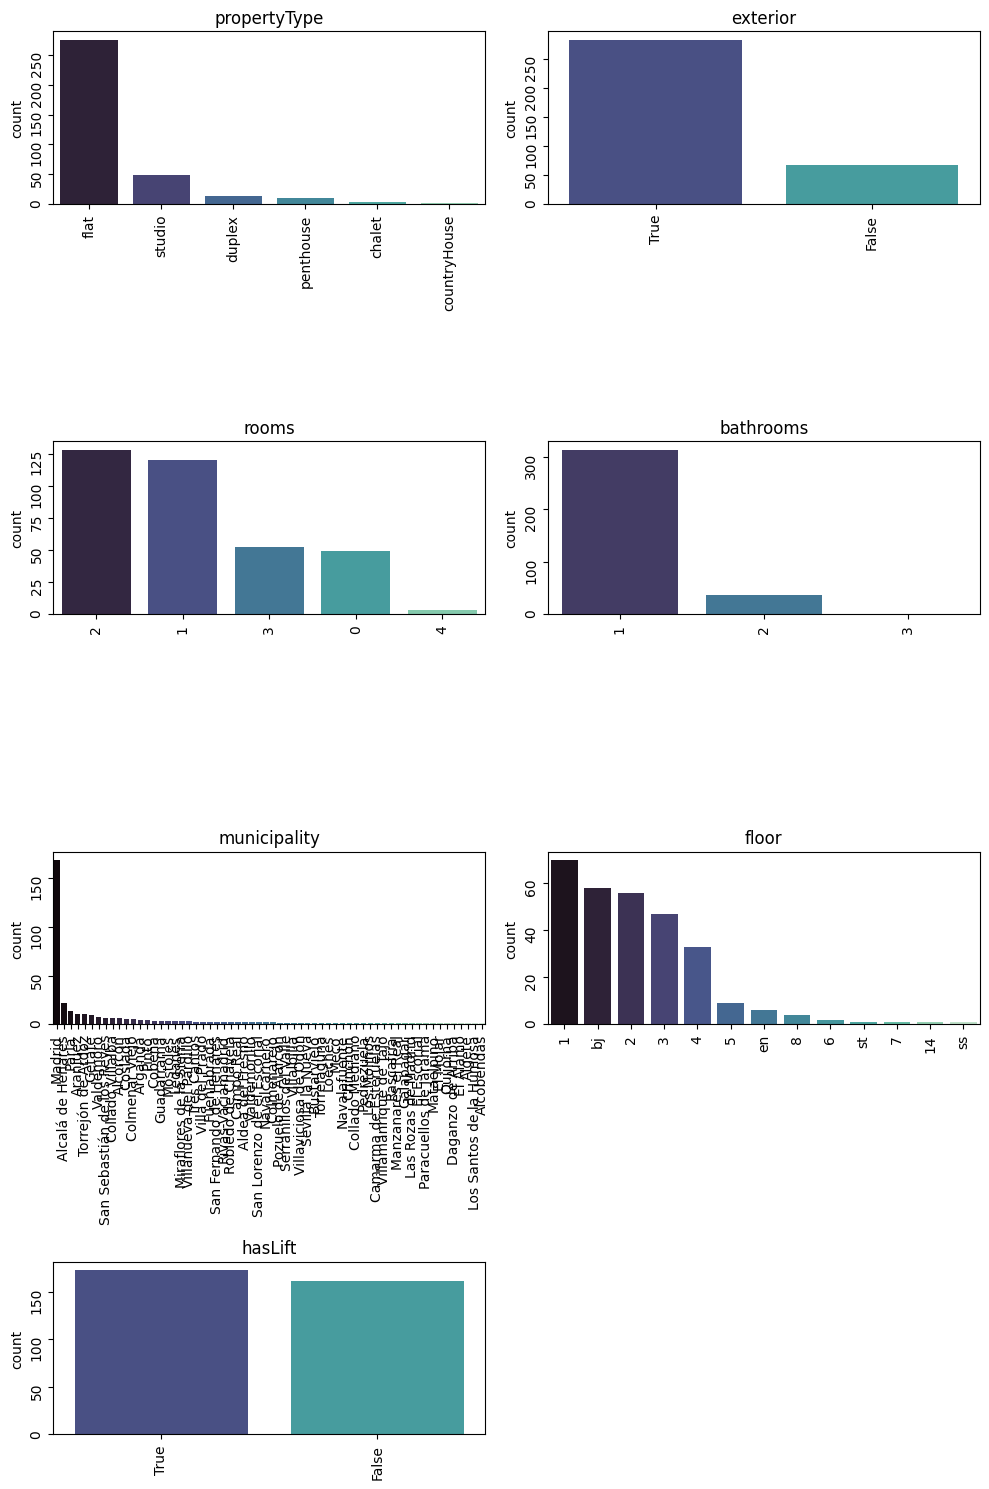

In [18]:
sp.plot_cat(df_cat, tamano_grafica=(10,15))

- Como se mencionó anteriormente en el describe, para las variables categóricas, las ocurrencias más frecuentes son de pisos, exteriores, con 1-2 habitaciones y 1 baño, en el municipio de Madrid, repartidas entre bajos y la tercera planta. La característica de ascensor se encuentra bastante repartida, habiendo más ocurrencias de con ascensor.

- Analizaremos ahora las relaciones entre variables utilizando bar y scatter plots.

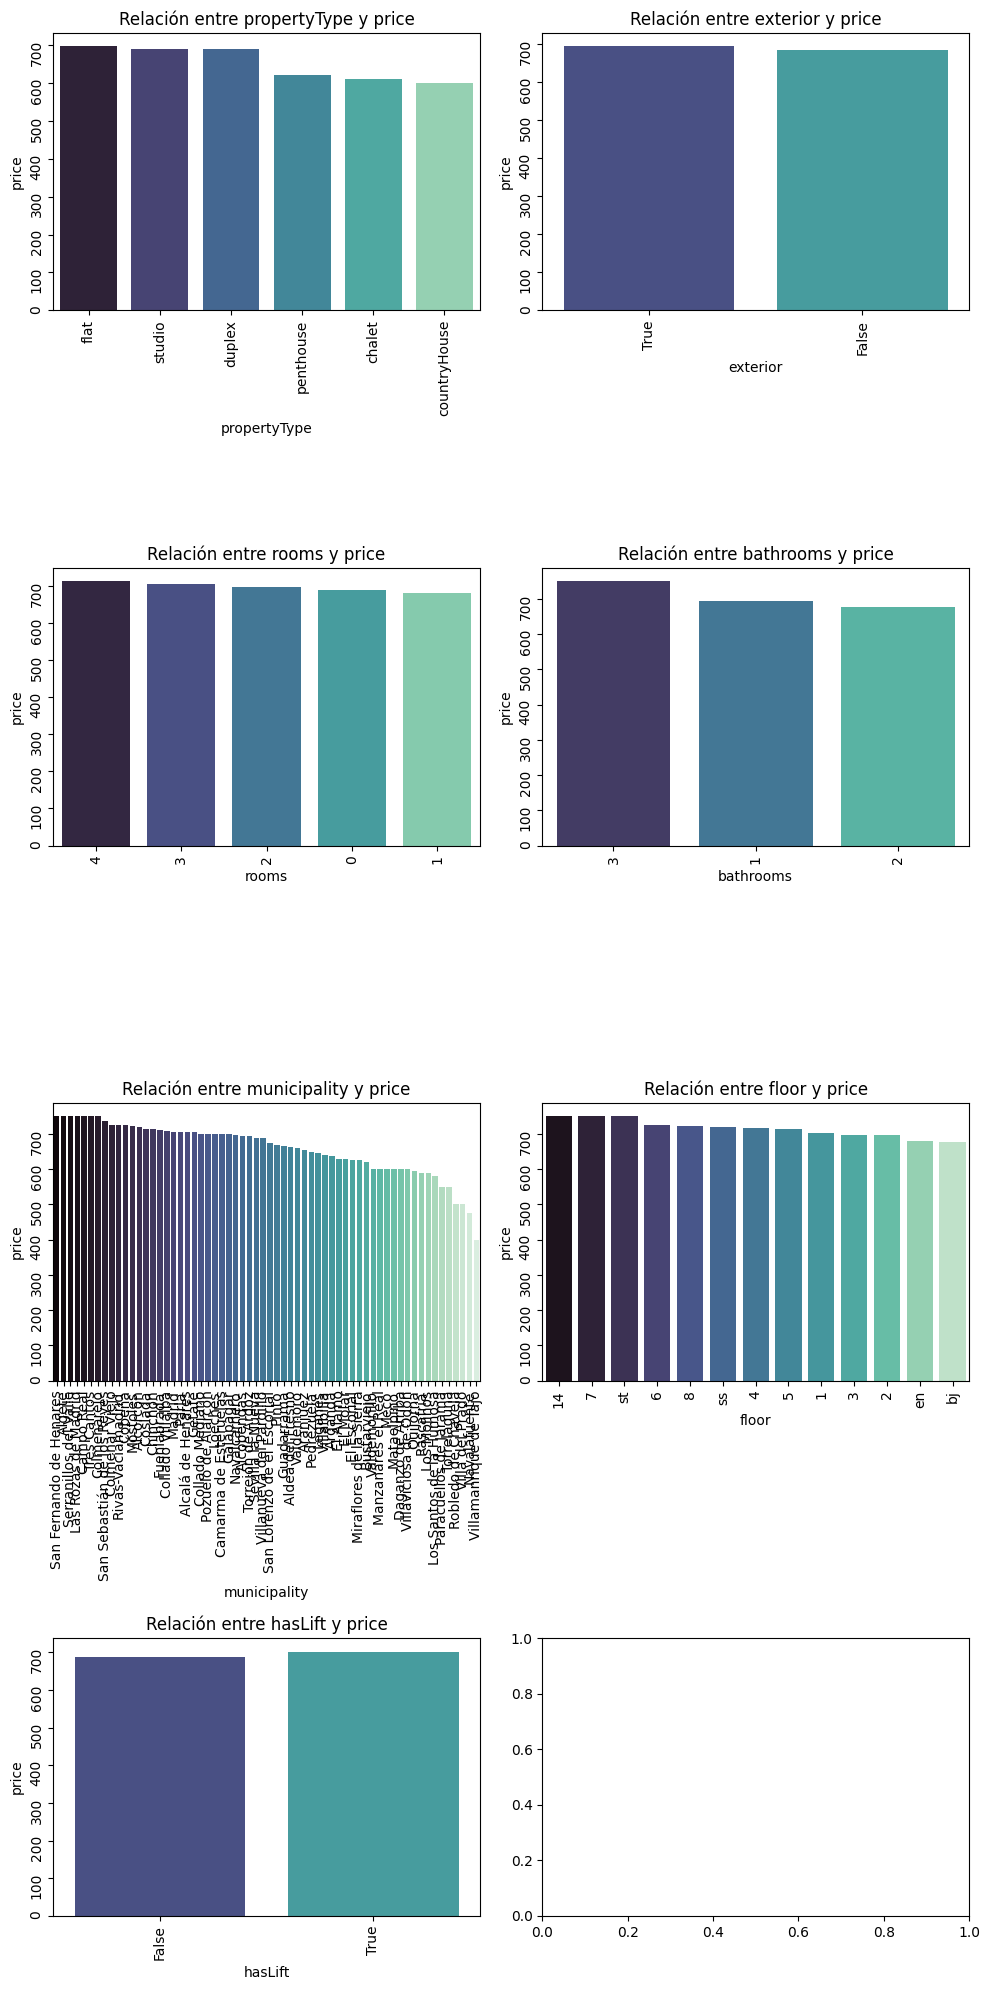

In [19]:
sp.relacion_vs_cat(df, "price", tamano_grafica=(10,20))

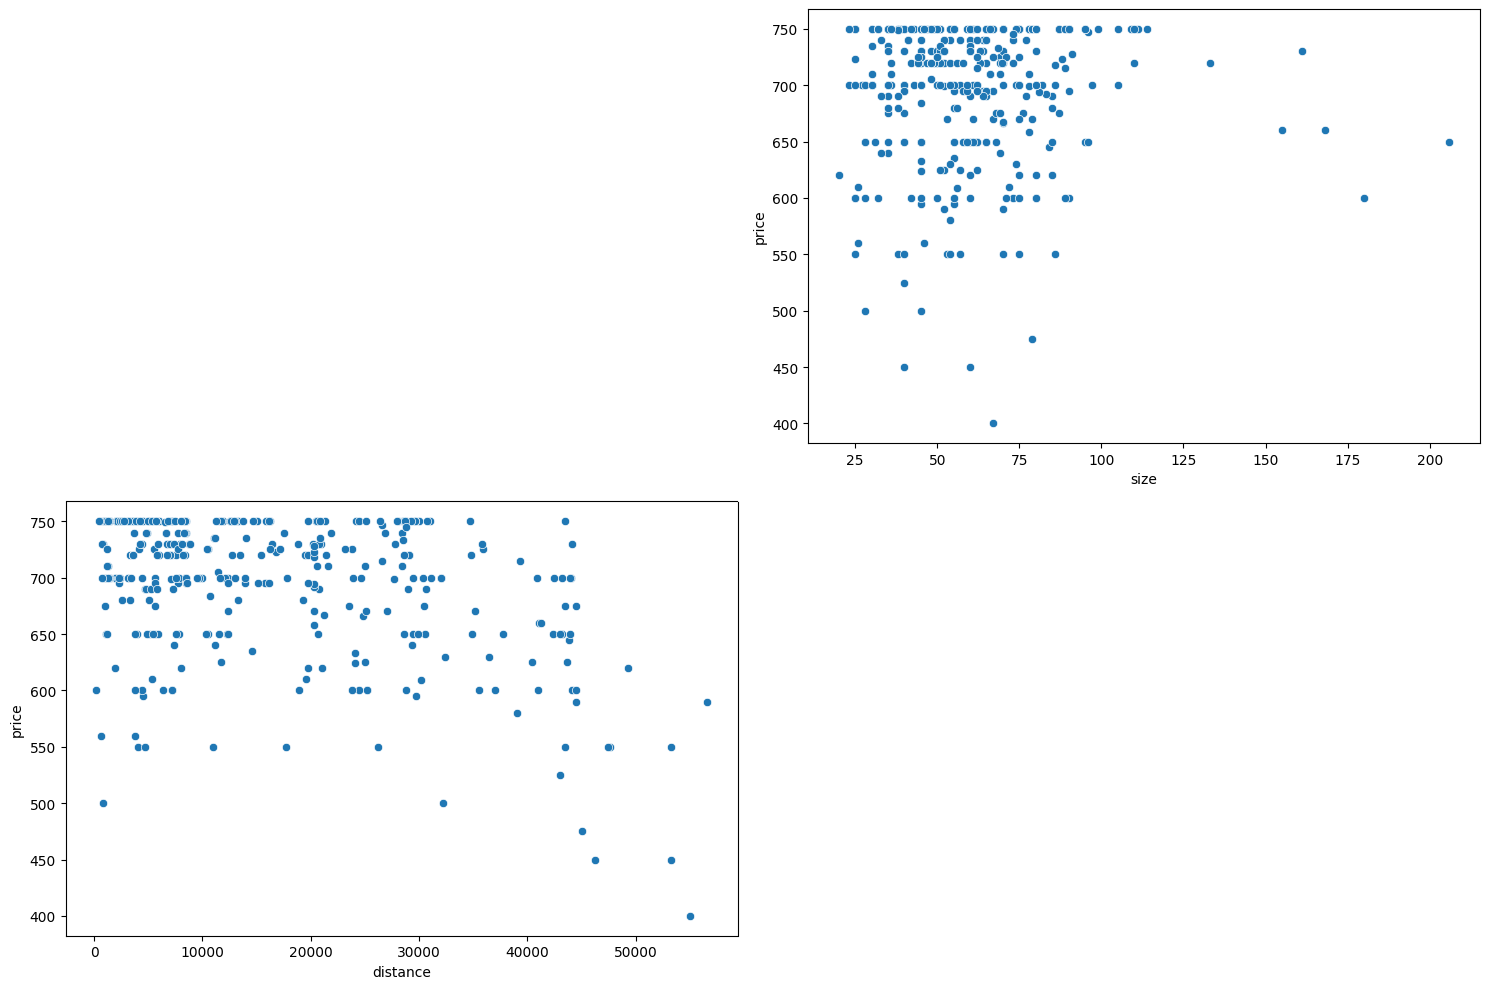

In [20]:
sp.relacion_vs_numericas(df, "price")

- En la gráfica de relación entre price y size, podemos ver que, no existe una relación clara entre el aumento de metros cuadrados y el precio, sino que todos tienden a agruparse por encima de los 600 euros. Esto podría ser causa de que, hay mayor demanda de pisos pequeños, con cada vez más habitantes que deciden vivir en casas pequeñas.

- En el caso de price y distance, podríamos entender que, los precios se mantienen por encima de los 600 euros debido a que, según aumenta la distancia del centro, el tamaño de las casas es mayor. En el caso de Madrid, en zonas más alejadas del centro se encuentran inmuebles de valor elevado, como pueden ser Moncloa-Aravaca, Pozuelo y Alcobendas.

- Veamos ahora una matriz de correlación:

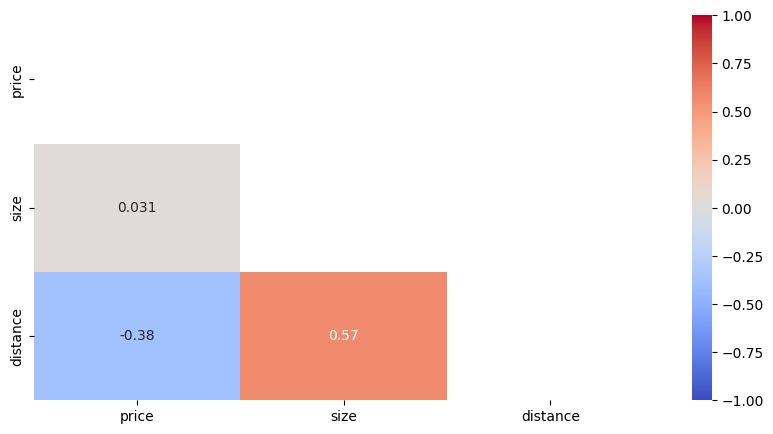

In [21]:
sp.matriz_correlacion(df)

- La matriz de correlación muestra correlación muy baja en las variables de size y distance con price, como hemos observado también en las gráficas anteriores.
- En el caso de size y distance la correlación es mayor, siendo que, según aumenta la distancia desde el centro aumenta también el tamaño de las viviendas.
- Observaremos finalmente los outliers en un boxplot:

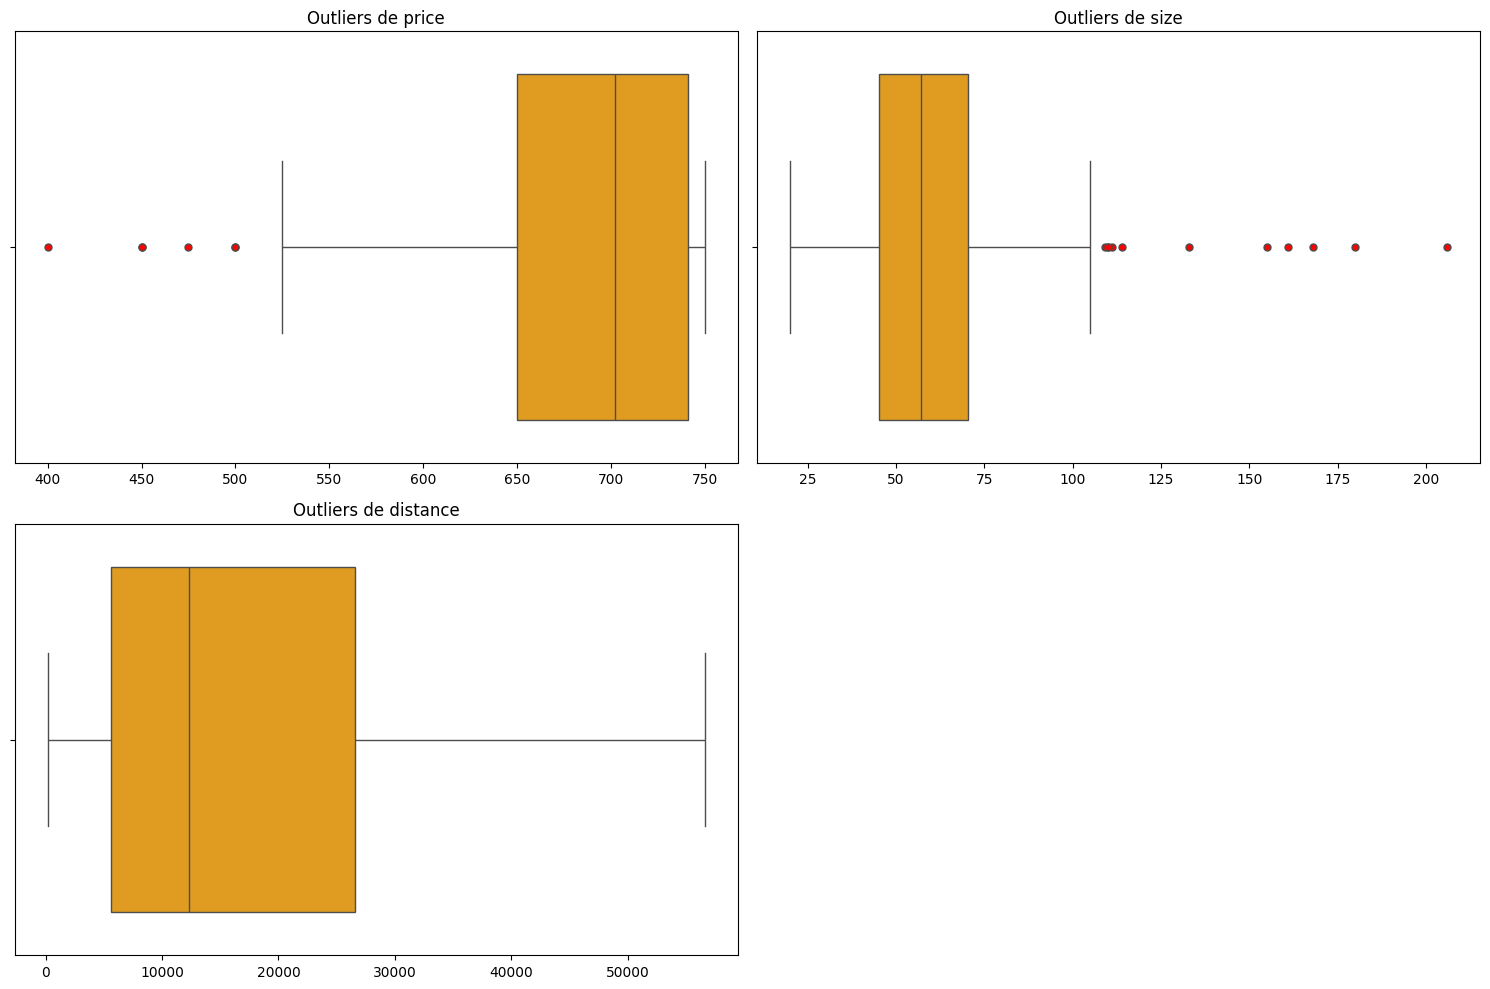

In [22]:
sp.detectar_outliers(df)

- Podemos ver que, en el caso de price, tenemos outliers muy claros y puntuales. Por su parte, en size, tenemos algunos adicionales, pero que aún se corresponden con tamaños posibles de chalets.
- Separaremos algunos datos por considerar que no debe utilizarse un mismo modelo para:
    - viviendas grandes, de más de 150 metros cuadrados.
    - viviendas con alquileres inferiores a 500 euros.


In [23]:
df = df[df["size"]<150]
df = df[df["price"]>500]

- Revisaremos ahora los datos nulos:

In [24]:
df.isnull().sum()

price            0
propertyType     0
size             0
exterior         0
rooms            0
bathrooms        0
municipality     0
distance         0
floor           58
hasLift         15
dtype: int64

- Vemos que, no tenemos valores nulos en variables numéricas, por lo que no será necesario el uso de imputadores.
- Para los nulos en "floor" y "hasLift", los rellenaremos con una nueva categoría llamada "Sin información".

In [25]:
df[["floor", "hasLift"]] = df[["floor", "hasLift"]].fillna("Sin información")

In [26]:
df.isnull().sum()

price           0
propertyType    0
size            0
exterior        0
rooms           0
bathrooms       0
municipality    0
distance        0
floor           0
hasLift         0
dtype: int64

- Guardamos el DF que pasará al paso #2 del preprocesamiento, donde realizaremos el Encoding de las variables categóricas.

In [27]:
df.reset_index(inplace=True, drop=True)
df.to_csv("../../datos/modelo1/csv_sin_nulos.csv")